In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
apps_data = pd.read_csv('Google-Playstore.csv')
apps_data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [3]:
apps_data.shape

(1118136, 23)

### Rating vs Installations
##### Data Cleaning

In [4]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

In [5]:
apps_data.isnull().sum()

App Name                  1
App Id                    0
Category                  3
Rating                 6850
Rating Count           6850
Installs                161
Minimum Installs        161
Maximum Installs          0
Free                      0
Price                     0
Currency                161
Size                      0
Minimum Android        2013
Developer Id              2
Developer Website    414366
Developer Email          22
Released               7730
Last Updated              0
Content Rating            0
Privacy Policy       153524
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64

In [6]:
apps_data.dropna(how = 'any', subset = ['Rating'], axis = 0, inplace = True)

In [7]:
apps_data['Rating'].isnull().any()

False

In [8]:
apps_data.dropna(how = 'any', subset = ['Rating'], axis = 0, inplace = True)

In [9]:
apps_data.Rating.isnull().sum()

0

### Let's see if any apps have rating 0

In [10]:
apps_data[apps_data['Rating'] == 0].head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
38,Image from Video Grabber-7,style_7.imagefromvideograbber_7,Tools,0.0,0.0,100+,100.0,222,True,0.00,...,Style-7,http://styleseven.com/,ms-7@styleseven.com,"Feb 12, 2020","Feb 12, 2020",Everyone,NaN,True,False,False
41,Qwick Business,com.qwickmobilebusiness,Lifestyle,0.0,0.0,100+,100.0,168,True,0.00,...,"Qwick, Inc.",https://www.qwick.com,help@qwick.com,"Dec 19, 2019","Sep 17, 2020",Everyone,http://www.qwick.com/privacy-policy/,False,False,False
58,s3afw BETA TEST,com.ubtsupport.beta.s3afw,Business,0.0,0.0,100+,100.0,183,True,0.00,...,Universal Business Team,NaN,streamline3@ubtsupport.com,"May 10, 2016","Nov 05, 2020",Everyone,http://www.ubtsupport.com/legal/privacy.php,False,False,False
133,"Smart Invoice – Create, Record, Track all invoice",com.generator.invoices,Business,0.0,0.0,"1,000+",1000.0,3607,True,0.00,...,Kruso Team,https://invoice.kruso.app/privacy/en,info@kruso.me,"Aug 21, 2020","Oct 19, 2020",Everyone,https://PDFScanner.kruso.app/privacy,True,True,False
137,Construction Master EZ,com.calculated.laurene4067,Tools,0.0,0.0,50+,50.0,90,False,29.99,...,Calculated Industries,https://www.calculated.com,ciandroid4840@gmail.com,"Apr 19, 2019","Apr 19, 2019",Everyone,https://www.calculated.com/calc-apps/privacy.asp,False,False,False


#### Formatting Installs from dtype string to int

In [11]:
installs = []
for it in apps_data['Installs']:
    installs.append(it.replace(',', '').replace('+', '').strip())

In [12]:
apps_data['Installs'] = installs
apps_data['Installs'] = apps_data['Installs'].astype('int')

In [13]:
apps_data['Installs'].value_counts().head()

1000     197466
100      176193
10000    157465
10       102678
500       82736
Name: Installs, dtype: int64

In [17]:
apps_data['Rating'].value_counts().head()

0.0    433265
4.2     53072
4.4     52815
4.3     50928
4.5     47129
Name: Rating, dtype: int64

In [19]:
apps_data[apps_data['Rating'] == 0]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
38,Image from Video Grabber-7,style_7.imagefromvideograbber_7,Tools,0.0,0.0,100,100.0,222,True,0.00,...,Style-7,http://styleseven.com/,ms-7@styleseven.com,"Feb 12, 2020","Feb 12, 2020",Everyone,NaN,True,False,False
41,Qwick Business,com.qwickmobilebusiness,Lifestyle,0.0,0.0,100,100.0,168,True,0.00,...,"Qwick, Inc.",https://www.qwick.com,help@qwick.com,"Dec 19, 2019","Sep 17, 2020",Everyone,http://www.qwick.com/privacy-policy/,False,False,False
58,s3afw BETA TEST,com.ubtsupport.beta.s3afw,Business,0.0,0.0,100,100.0,183,True,0.00,...,Universal Business Team,NaN,streamline3@ubtsupport.com,"May 10, 2016","Nov 05, 2020",Everyone,http://www.ubtsupport.com/legal/privacy.php,False,False,False
133,"Smart Invoice – Create, Record, Track all invoice",com.generator.invoices,Business,0.0,0.0,1000,1000.0,3607,True,0.00,...,Kruso Team,https://invoice.kruso.app/privacy/en,info@kruso.me,"Aug 21, 2020","Oct 19, 2020",Everyone,https://PDFScanner.kruso.app/privacy,True,True,False
137,Construction Master EZ,com.calculated.laurene4067,Tools,0.0,0.0,50,50.0,90,False,29.99,...,Calculated Industries,https://www.calculated.com,ciandroid4840@gmail.com,"Apr 19, 2019","Apr 19, 2019",Everyone,https://www.calculated.com/calc-apps/privacy.asp,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118129,Campaign Blaster Yuge Edition,com.unifeyed.CampaignBlasterYuge,Casual,0.0,0.0,50,50.0,60,True,0.00,...,UNIFEYED,http://www.unifeyed.com,development@unifeyed.com,"May 2, 2016","May 03, 2016",Everyone,http://unifeyed.com/privacy/,True,True,False
1118130,Safer Job Sites,com.unifeyed.safety,Productivity,0.0,0.0,5,5.0,5,True,0.00,...,UNIFEYED,https://unifeyed.com,development@unifeyed.com,"Aug 21, 2019","Dec 05, 2019",Everyone,https://unifeyed.com/privacy,False,False,False
1118132,AutoThink,com.fleetenable.autothink,Productivity,0.0,0.0,100,100.0,127,True,0.00,...,Imaginnovate,http://www.imaginnovate.com,krishna@imaginnovate.com,"Nov 26, 2019","Nov 13, 2020",Everyone,http://www.imaginnovate.com,False,False,False
1118133,FieldEnable,com.fieldenable.app.fieldenable,Business,0.0,0.0,100,100.0,282,True,0.00,...,Imaginnovate,http://www.imaginnovate.com,FieldEnable@imaginnovate.com,"Apr 30, 2018","Nov 30, 2020",Everyone,http://tw.fieldenable.com/privacy,False,False,False


###### Checking if any apps have zero installations and rating zero or higher

In [20]:
 x = apps_data[(apps_data['Installs'] == 0) & (apps_data['Rating'] >= 0)]
 x.shape

(8826, 23)

### So we are not interested in determining zero installed app's rating

In [21]:
ins_data = apps_data[apps_data['Installs'] > 0]

In [22]:
ins_data.shape

(1102460, 23)

In [24]:
ins_data = ins_data[ins_data['Rating'] > 0]

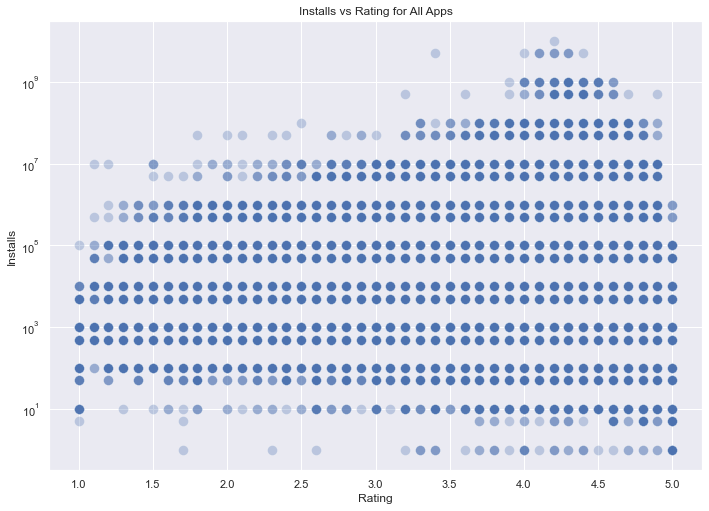

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(data= ins_data, x='Rating', y='Installs', s = 100, alpha = 0.3)
ax.set_title('Installs vs Rating for All Apps')
ax.set_yscale('log')
plt.show()

In [91]:
high_rate = ins_data[ins_data['Rating'] > 4]
high_rate.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,1000000,1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,50000000,50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,100000000,100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,50000,50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False
6,Jobonji: hire local pros handyman for odd jobs...,com.pack.jobonji,Lifestyle,4.4,3346.0,100000,100000.0,224897,True,0.0,...,"Jobonji, Inc",https://www.jobonji.com/,support@jobonji.com,"Jan 10, 2018","Sep 30, 2019",Everyone,https://www.jobonji.com/privacy.html,False,True,False


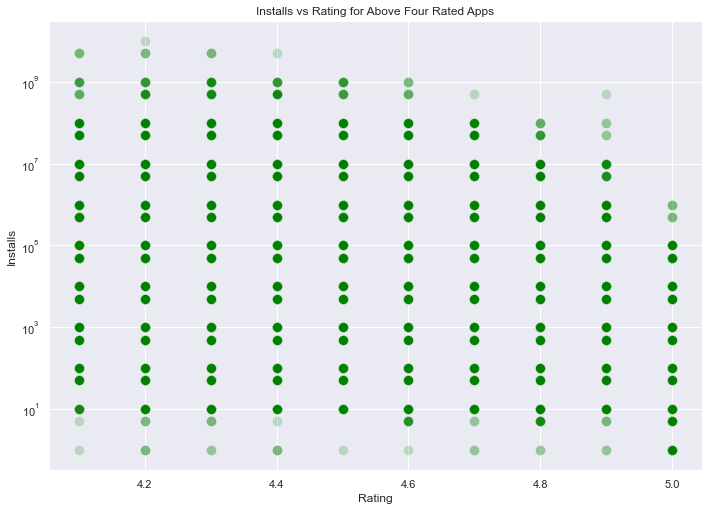

In [92]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(data= high_rate, x='Rating', y='Installs', s = 100, alpha = 0.2, color = 'green')
ax.set_title('Installs vs Rating for Above Four Rated Apps')
ax.set_yscale('log')
plt.show()

### Rating vs Content Rating

In [115]:
rating_data = pd.read_csv('Google-Playstore.csv')
rating_data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [116]:
rating_data['Content Rating'].value_counts()

Everyone           968246
Teen                99775
Mature 17+          31965
Everyone 10+        18030
Unrated                66
Adults only 18+        54
Name: Content Rating, dtype: int64

In [117]:
(rating_data['Rating'] == 0).value_counts()

False    684871
True     433265
Name: Rating, dtype: int64

In [119]:
rating_data.dropna(how = 'any', subset = ['Rating'], axis = 0, inplace = True)

In [120]:
rating_data.Rating.isnull().sum()

0

In [143]:
rating_data = rating_data[rating_data['Rating'] > 0]
(rating_data['Rating'] == 0).value_counts()

False    678021
Name: Rating, dtype: int64

In [144]:
rating_data['Content Rating'].value_counts()

Everyone           580865
Teen                63280
Mature 17+          20482
Everyone 10+        13299
Unrated                58
Adults only 18+        37
Name: Content Rating, dtype: int64

Unrated and Adults only 18+ are negligible, so dropping those values. 

In [145]:
temp = []
for t in rating_data['Content Rating']:
    temp.append(t.replace('Adults only 18+', 'NaN').replace('Unrated', 'NaN'))

rating_data['Content Rating'] = temp

In [154]:
temp1 = rating_data[rating_data['Content Rating'] == 'NaN'].index
rating_data.drop(labels = temp1, inplace = True)


In [155]:
rating_data['Content Rating'].value_counts()

Everyone        580865
Teen             63280
Mature 17+       20482
Everyone 10+     13299
Name: Content Rating, dtype: int64

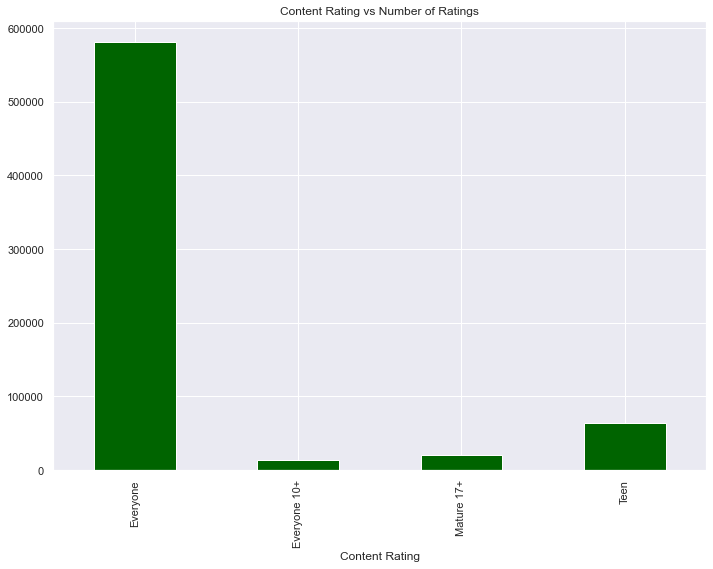

In [192]:
import matplotlib.pyplot as plt
rating_data.groupby(['Content Rating'])['Rating'].count().plot.bar(title = "Content Rating vs Number of Ratings", color="darkgreen")
plt.show()


We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

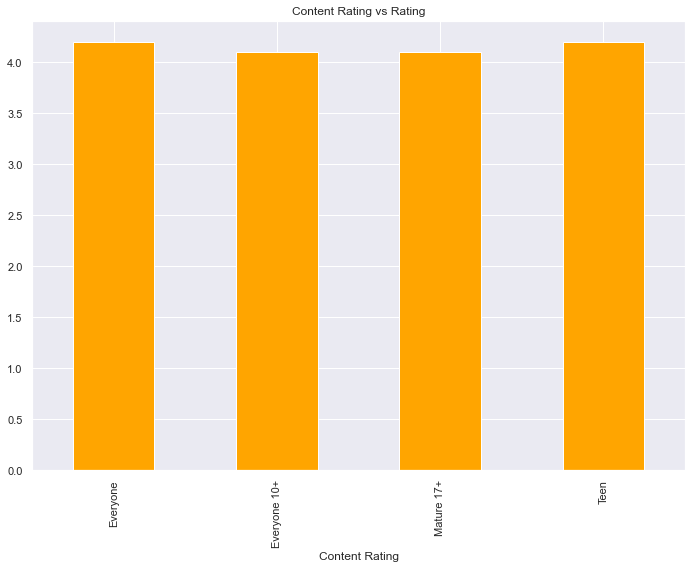

In [198]:
rating_data.groupby(['Content Rating'])['Rating'].median().plot.bar(title = 'Content Rating vs Rating', color="orange")
plt.show()

### Category vs Mean Distribution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
cat_data = pd.read_csv('Google-Playstore.csv')
cat_data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [16]:
cat_data['Category'].value_counts()

Education                  67805
Music & Audio              55678
Entertainment              50003
Personalization            47920
Books & Reference          47699
Tools                      47102
Lifestyle                  31358
Photography                18312
Business                   17905
Productivity               17608
Puzzle                     17436
Finance                    16752
Health & Fitness           16339
Casual                     14549
Sports                     14535
Travel & Local             14156
News & Magazines           13861
Simulation                 13358
Arcade                     11796
Communication              11182
Social                     10523
Action                     10110
Shopping                   10103
Food & Drink                8659
Adventure                   7878
Educational                 7652
Video Players & Editors     6894
Maps & Navigation           6816
Medical                     6729
Art & Design                6017
Role Playi

#### Categories looks fine, there are no faulty categories

In [9]:
cat_data.dropna(how = 'any', subset = ['Rating'], axis = 0, inplace = True)

In [10]:
cat_data = cat_data[cat_data['Rating'] > 0]

In [14]:
(cat_data['Rating'] == 0).any().sum()

0

In [21]:
(cat_data['Installs'] == 0).any().sum()

0

Text(0.5, 1.0, 'Mean Rating Per Category')

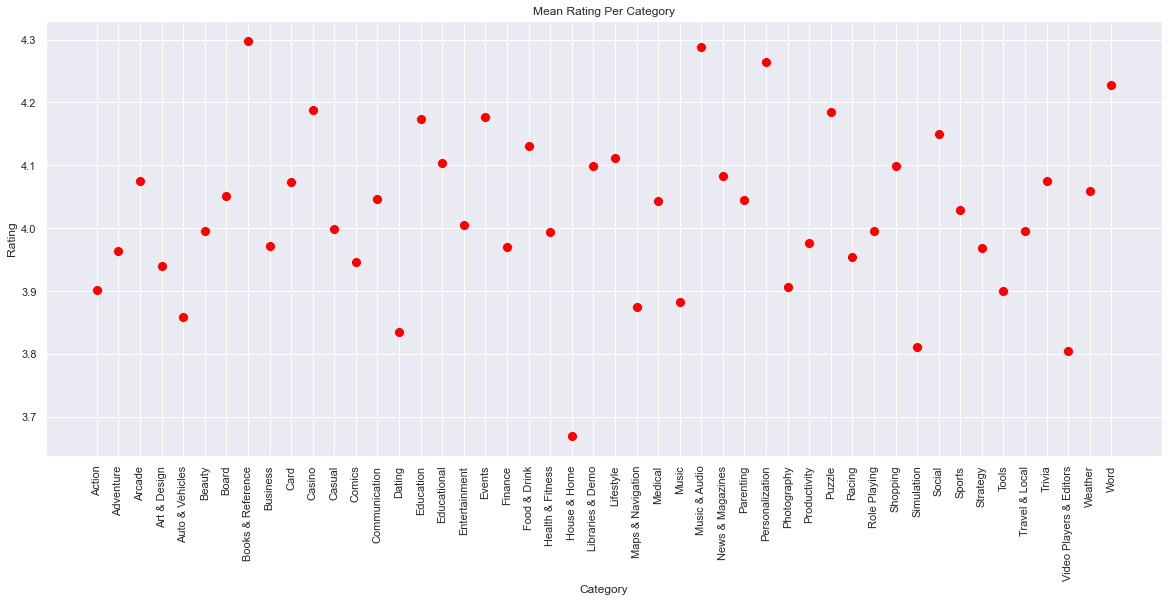

In [42]:
sns.set(rc={'figure.figsize':(20, 8)})

d =cat_data.groupby('Category')['Rating'].mean().reset_index()
ax = sns.scatterplot(data= d, x= d.Category, y = d.Rating, s = 100, color = 'red')
plt.xticks(rotation=90)
ax.set_title('Mean Rating Per Category')





In [50]:
cat_data['Maximum Installs'].max()

10772700105